In [658]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [659]:
# --- global variables --- #

hbar = 0.658 # eV fs
c = 299.792 # nm fs{-1}

m0 = 0.510 * 10e6 # eV
mu = 0.108 * m0 # eV

veps0 = 55.26 # e{2} eV{-1} nm{-1}
vepsS = 3.32
vepsW = 6.10

Lwell = 0.636 # nm
r0 = Lwell * (vepsW/(2*vepsS)) # nm

#A = 1/(8*(np.pi**2)*veps0*vepsS) # eV nm
A = (8*(np.pi**2)*veps0*vepsS)


In [660]:
# --- simulation parameters --- #

k_max = 0.75
N = 500
dk = k_max/N

k_vals = np.linspace(dk, k_max, N)

t_max = 2*np.pi
T = 250
dt = t_max/T

cos_vals = np.cos(np.linspace(dt, 2*np.pi, T))

In [661]:
def RytovaKeldysh(ki, kj): # Riemann sum over thetas

    q = np.sqrt(ki**2 + kj**2 - 2*ki*kj*cos_vals)
    Vl = 1/(q * (1 + r0*q))

    V = np.sum(Vl)

    return V # * A (should be multiplying)

In [662]:
def Coulomb(): # Riemann sum of the kj components

    V = np.zeros((N, N))

    for i in range(N):
        for j in range(N):

            if i == j:
                V[i][j] = 0
            else:
                V[i][j] = dk * k_vals[j] * RytovaKeldysh(k_vals[i], k_vals[j])

    np.savetxt("Coulomb.txt", V, fmt="%.10f")

    return V

In [663]:
def WannierMatrix(): # construction of the Wannier matrix

    K = np.diag( (c**2 * hbar**2 * k_vals**2)/(2 * mu) ) # eV

    H = K + Coulomb() # wrong sign

    np.savetxt("Hamiltonian.txt", H, fmt="%.10f")

    return H

In [664]:
eigenvalues, eigenvectors = np.linalg.eig(WannierMatrix())
eigenvalues_SCP, eigenvectors_SCP = la.eig(WannierMatrix())

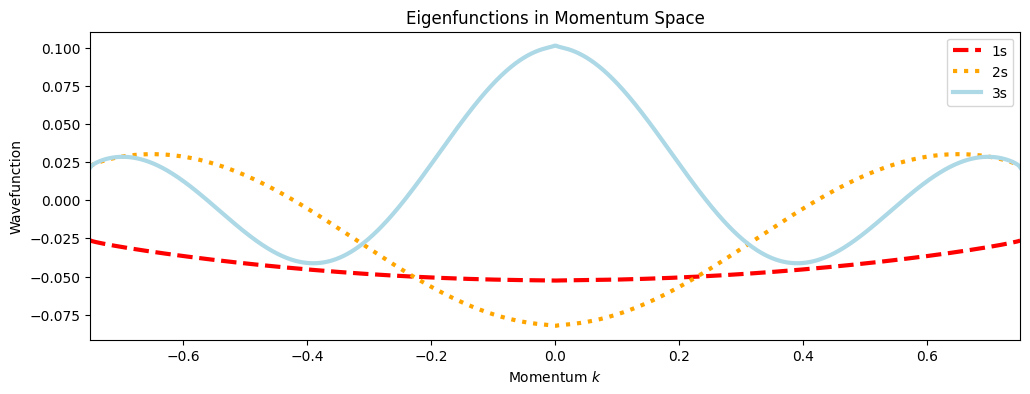

In [665]:
plot_x = np.concatenate((np.flip((-1)*k_vals), k_vals))

plt.figure(figsize=(12,4))

plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,0]),eigenvectors[:,0])), label=f'1s', c='red', linewidth=3, linestyle='--')
plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,1]),eigenvectors[:,1])), label=f'2s', c='orange', linewidth=3, linestyle=':')
plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,2]),eigenvectors[:,2])), label=f'3s', c='lightblue', linewidth=3)

plt.xlabel('Momentum $k$')
plt.xlim(-0.75, 0.75)
plt.ylabel('Wavefunction')
plt.title('Eigenfunctions in Momentum Space')
plt.legend()
plt.show()

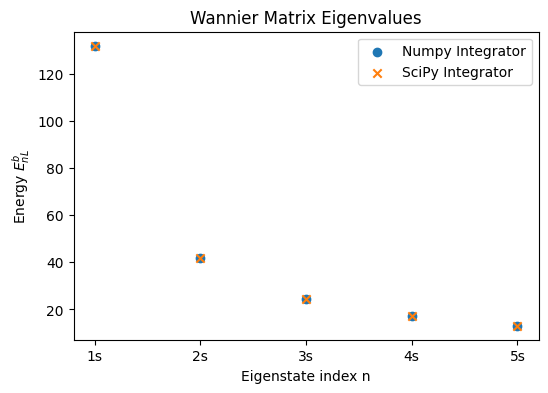

In [666]:
plt.figure(figsize=(6,4))
plt.scatter(['1s', '2s' , '3s' , '4s', '5s'], eigenvalues[:5], label='Numpy Integrator')
plt.scatter(['1s', '2s' , '3s' , '4s', '5s'], eigenvalues_SCP[:5], label='SciPy Integrator', marker='x')
plt.xlabel('Eigenstate index n')
plt.ylabel('Energy $E_{nL}^b$')
plt.title('Wannier Matrix Eigenvalues')
plt.legend()
plt.show()

In [667]:
eigenvalues[:5]

array([132.05950855,  41.99042877,  24.42768164,  17.09778602,
        13.08867383])

In [668]:
eigenvalues_SCP[:5]

array([132.05950855+0.j,  41.99042877+0.j,  24.42768164+0.j,
        17.09778602+0.j,  13.08867383+0.j])